In [80]:
import pandas as pd
import statsmodels.api as sm
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [4]:
metadata_path = '../../data/metadata/'
sim_data_path = '../../data/unigram/'
master_path = '../../data/master_tables'

In [2]:
agg_path = '../../data/agg_unigram/'

In [3]:
# fandom_list = [line.strip() for line in open('../../data/fandom_filtered_list')]

In [6]:
fandom_list = [i for i in os.listdir(agg_path) if 'tsv' in i]

In [7]:
fandom_list

['arthurian_mythology_&_related_fandoms_agg_unigram_sgt_cos.tsv',
 'bishoujo_senshi_sailor_moon_agg_unigram_sgt_cos.tsv',
 'buffy_the_vampire_slayer_agg_unigram_sgt_cos.tsv',
 'haikyuu_agg_unigram_sgt_cos.tsv',
 'hamilton_miranda_agg_unigram_sgt_cos.tsv',
 'hetalia_axis_powers_agg_unigram_sgt_cos.tsv',
 'kuroko_no_basuke_agg_unigram_sgt_cos.tsv',
 'les_miserables_all_media_types_agg_unigram_sgt_cos.tsv',
 'ms_paint_adventures_agg_unigram_sgt_cos.tsv',
 'naruto_agg_unigram_sgt_cos.tsv',
 'shakespare_william_works_agg_unigram_sgt_cos.tsv',
 'star_wars_all_media_types_agg_unigram_sgt_cos.tsv',
 'the_walking_dead_&_related_fandoms_agg_unigram_sgt_cos.tsv']

In [8]:
df = pd.read_csv(os.path.join(agg_path,'arthurian_mythology_&_related_fandoms'+'_agg_unigram_sgt_cos.tsv'), sep = '\t')

In [9]:
df.head(2)

,Unnamed: 0,Author,Hits,Kudos,Title,Words,UpdateDate,Bookmarks,Comments,Chapters,PublishDate,CompleteDate,completed_in_days,cos
0,0,firewolfsg,4067.0,30.0,Eye of the Beholder,1152.0,NaN,6,7,1,2609,2609.0,0.0,0.161426
1,1,Sioux,283.0,8.0,Merlin and the Owl,17578.0,NaN,1,4,1,1905,1905.0,0.0,0.095096


In [10]:
df.columns.values

array(['Unnamed: 0', 'Author', 'Hits', 'Kudos', 'Title', 'Words',
       'UpdateDate', 'Bookmarks', 'Comments', 'Chapters', 'PublishDate',
       'CompleteDate', 'completed_in_days', 'cos'], dtype=object)

In [34]:
def create_df(fname):
    ### Create table: merge the one with JSD and the master table w/ old KL
    ### Only keep the numeric variables
    df = pd.read_csv(os.path.join(agg_path,fname), sep = '\t')
    df['Cosine_distance'] = df['cos']
    df = df[['Hits', 'Kudos', 'Words', 'Bookmarks', 'Comments', 'Chapters', 'PublishDate', 'Cosine_distance']]
#     df = df.fillna(0)
    return df

In [35]:
df_all = []
for fandom in fandom_list:
    # for some we don't have the master table.
    df_all.append(create_df(fandom))
    print ('did: ', fandom)

df_all = pd.concat(df_all)

did:  arthurian_mythology_&_related_fandoms_agg_unigram_sgt_cos.tsv
did:  bishoujo_senshi_sailor_moon_agg_unigram_sgt_cos.tsv
did:  buffy_the_vampire_slayer_agg_unigram_sgt_cos.tsv
did:  haikyuu_agg_unigram_sgt_cos.tsv
did:  hamilton_miranda_agg_unigram_sgt_cos.tsv
did:  hetalia_axis_powers_agg_unigram_sgt_cos.tsv
did:  kuroko_no_basuke_agg_unigram_sgt_cos.tsv
did:  les_miserables_all_media_types_agg_unigram_sgt_cos.tsv
did:  ms_paint_adventures_agg_unigram_sgt_cos.tsv
did:  naruto_agg_unigram_sgt_cos.tsv
did:  shakespare_william_works_agg_unigram_sgt_cos.tsv
did:  star_wars_all_media_types_agg_unigram_sgt_cos.tsv
did:  the_walking_dead_&_related_fandoms_agg_unigram_sgt_cos.tsv


In [36]:
len(df_all)

13000

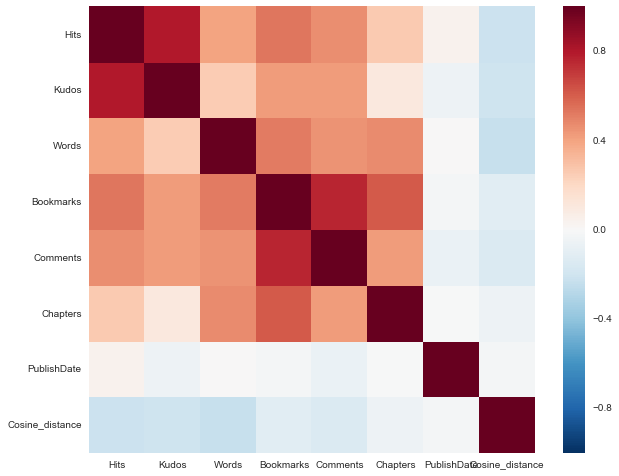

In [38]:
# plt.matshow(df.corr())
plt.figure(figsize = (10,8))
sns.heatmap(df_all.astype(float).corr())
# plt.tight_layout()
plt.savefig('corr_heatmap_agg_1000.png', format='png')


In [126]:
# df_all = df_all.astype(float)
# for col in df_all.columns.values:
#     df_all[col] = (df_all[col] - df_all[col].mean())/df_all[col].std(ddof=0)

In [49]:
df_all.to_csv('regression_data.csv', index=False)

In [50]:
# df_all = df_all.dropna(how='any')

In [51]:
exog = df_all[['Hits', 'Words', 'Bookmarks', 'Comments', 'Chapters', 'PublishDate', 'Cosine_distance']].astype(float).as_matrix()
endog = df_all['Kudos'].astype(float).as_matrix()
mod_nbin = sm.NegativeBinomial(endog, exog)
res_nbin = mod_nbin.fit()
print(res_nbin.summary())

         Current function value: nan
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1


/Users/jingy/anaconda/envs/python35/lib/python3.5/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jingy/anaconda/envs/python35/lib/python3.5/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                     NegativeBinomial Regression Results                      
Dep. Variable:                      y   No. Observations:                12998
Model:               NegativeBinomial   Df Residuals:                    12991
Method:                           MLE   Df Model:                            6
Date:                Wed, 14 Jun 2017   Pseudo R-squ.:                     nan
Time:                        21:30:52   Log-Likelihood:                    nan
converged:                      False   LL-Null:                       -67910.
                                        LLR p-value:                       nan
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1                nan        nan        nan        nan           nan       nan
x2                nan        nan        nan        nan           nan       nan
x3                nan        nan        nan        n

In [53]:
df_all.head(2)

,Hits,Kudos,Words,Bookmarks,Comments,Chapters,PublishDate,Cosine_distance
0,4067.0,30.0,1152.0,6,7,1,2609,0.161426
1,283.0,8.0,17578.0,1,4,1,1905,0.095096


In [77]:
df_all.sort('Chapters',ascending=False).head()

/Users/jingy/anaconda/envs/python35/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,Hits,Kudos,Words,Bookmarks,Comments,Chapters,PublishDate,Cosine_distance
200,75675.0,808.0,589564.0,17346,1134,26196,1544,0.577807
754,22645.0,410.0,181979.0,4446,70,20240,1016,0.502831
719,5601.0,180.0,14222.0,3266,615,20164,595,0.642460
745,27389.0,1120.0,125182.0,11772,970,11881,524,0.321317
965,1319.0,27.0,10000.0,297,13,9900,1239,0.708475


In [55]:
df_all.columns.values

array(['Hits', 'Kudos', 'Words', 'Bookmarks', 'Comments', 'Chapters',
       'PublishDate', 'Cosine_distance'], dtype=object)

In [85]:
sorted(np.log(df_all.Kudos))

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [86]:
np.log(2)

0.69314718055994529

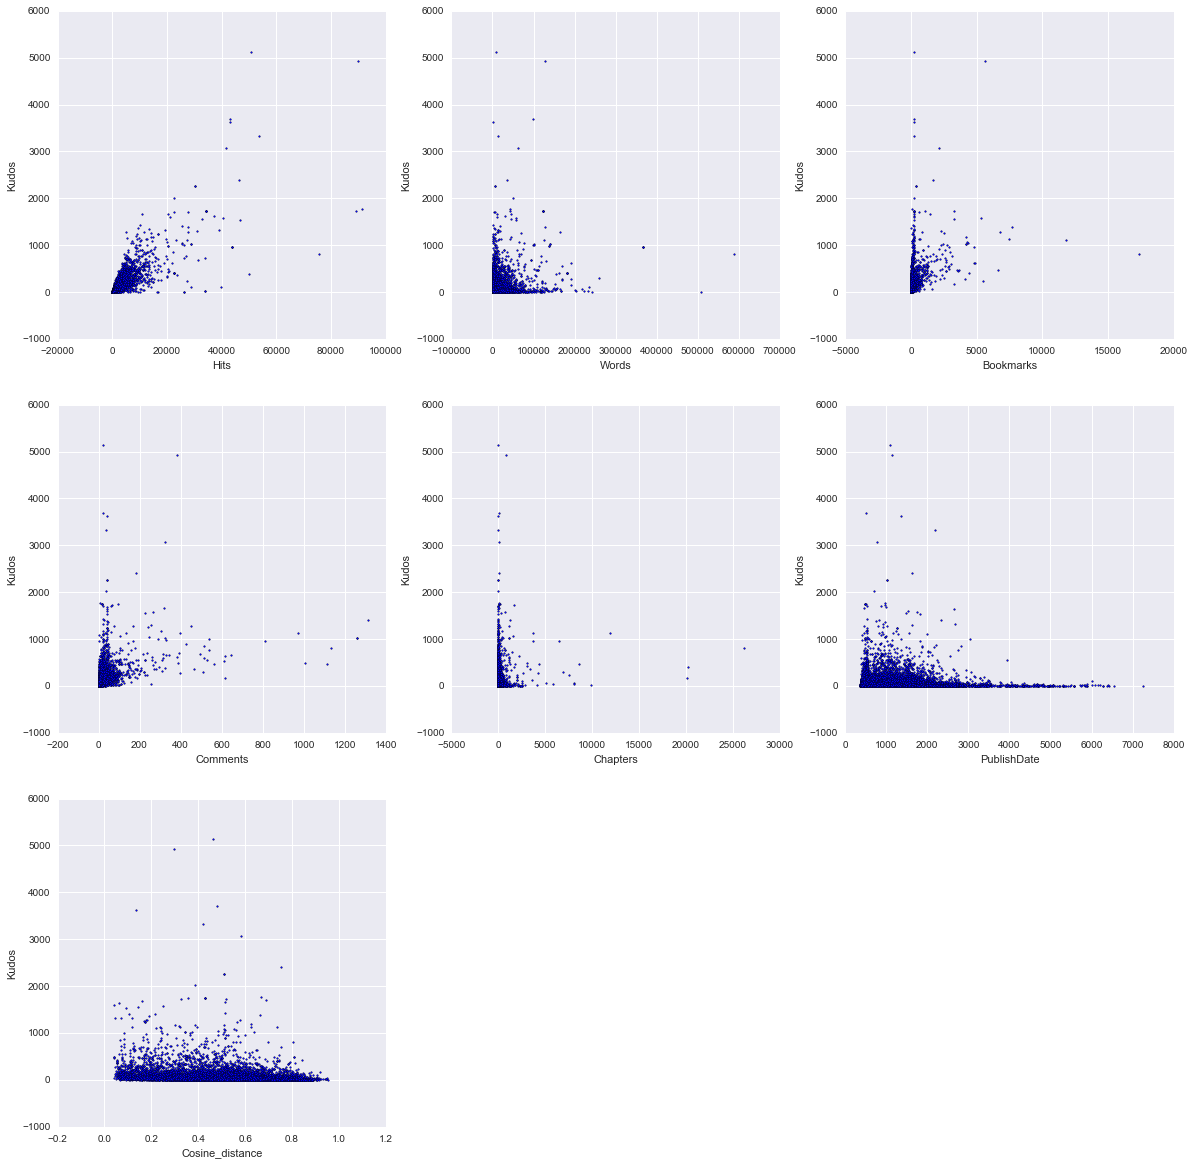

In [89]:
plt.figure(figsize=(20,20))
for i, field in enumerate(['Hits', 'Words', 'Bookmarks', 'Comments', 'Chapters','PublishDate', 'Cosine_distance']):
    plt.subplot(3, 3, i+1)
    plt.scatter(df_all[field], df_all['Kudos'],s=3)
    plt.xlabel(field)
#     plt.title(field)
    plt.ylabel('Kudos')
plt.savefig('fields_against_kudos.png',type='png')